# Lab 06: Credit Card Fraud Detection

---
author: Yiran Hu
date: March 31, 2024
embed-resources: true
---

## Introduction

In Lab 06, I'm working on creating a system that detects credit card fraud using machine learning. The goal is to analyze transactions to accurately predict which ones are fraudulent while maintaining a high recall rate. This means catching as many frauds as possible without sacrificing precision.

I'll use the "Credit Card Fraud Detection" dataset from Kaggle, which includes transactions over two days, highlighting the challenge of identifying the few frauds among many legitimate transactions. My approach involves the RandomForestClassifier, a powerful model for classification problems, to differentiate between fraud and non-fraud transactions. This lab aims to enhance the security of credit card transactions by using technology to replicate the sharp eye of financial experts.

## Methods

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from joblib import dump

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Data

In [67]:
fraud = pd.read_csv("https://cs307.org/lab-06/data/fraud.csv")

The dataset used in Lab 06 for detecting credit card fraud comes from a collaborative research between Worldline and the ULB Machine Learning Group, focusing on European transactions in September 2013. It includes over 284,807 transactions, with 492 marked as fraudulent, illustrating the challenge of identifying fraud in a heavily imbalanced dataset. Principal Component Analysis (PCA) transforms most features into 28 principal components to protect confidentiality, with 'Time' and 'Amount' being exceptions. This setup aims for fraud detection accuracy, using metrics like the Area Under the Precision-Recall Curve (AUPRC) to handle the imbalance. 

In [68]:
fraud_train, fraud_test = train_test_split(
    fraud,
    test_size=0.20,
    random_state=42,
    stratify=fraud["Fraud"],
)

# create X and y for train
X_train = fraud_train.drop("Fraud", axis=1)
y_train = fraud_train["Fraud"]

# create X and y for test
X_test = fraud_test.drop("Fraud", axis=1)
y_test = fraud_test["Fraud"]

In [69]:
fraud_train

,PC01,PC02,PC03,PC04,PC05,PC06,PC07,PC08,PC09,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,Amount,Fraud
57638,-0.514509,0.899378,1.627215,-0.142250,0.005250,-0.235422,0.482540,0.247403,-0.562327,-0.166813,...,-0.143290,-0.390205,0.030719,0.184779,-0.348711,0.073253,0.273217,0.107938,3.59,0
27686,-0.813568,-0.373893,1.152977,-0.449774,-3.868866,2.780636,3.654192,-0.672442,0.753230,-0.662803,...,-0.376783,-0.004239,0.074801,0.124238,-0.448493,0.861423,-0.093639,-0.711632,798.01,0
13321,-2.443142,3.258831,-0.791511,0.223548,0.007932,-1.263044,1.220214,-0.418068,1.860453,4.184883,...,-0.348587,0.531679,0.058990,0.371638,-0.207398,-0.505837,0.524542,-0.343895,1.79,0
28308,-0.397300,0.922104,1.224699,-0.334974,0.322603,-0.117372,0.534683,0.175550,-0.486404,-0.120147,...,-0.239303,-0.695001,-0.128231,-0.536463,-0.138971,0.107526,0.255644,0.100814,2.69,0
54252,1.994046,-0.367813,-0.462867,0.338661,-0.485326,-0.241576,-0.590987,0.089319,1.413224,-0.149292,...,-0.196388,-0.484457,0.421867,0.601393,-0.448014,-0.646256,0.027632,-0.027244,4.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49499,-0.033583,-0.487672,1.435406,-2.759369,-1.785638,0.402364,-2.306038,-2.287179,0.129717,-1.036412,...,-1.286823,0.824100,0.018890,0.000018,0.301618,0.081215,0.163422,0.252456,10.00,0
29250,-0.731245,1.151677,0.912393,-0.653540,0.700577,-0.461372,1.093273,-0.126254,-0.339171,-0.467356,...,-0.368185,-0.991854,-0.376461,-0.661608,0.554237,0.450650,0.076395,0.096252,6.99,0
31586,2.135923,-0.714182,-1.842502,-0.587267,0.090754,-0.465733,-0.024834,-0.328747,-0.659832,0.853241,...,-0.537267,-1.081138,0.196589,0.087797,-0.111583,0.479888,-0.082523,-0.053305,64.90,0
14898,-0.335632,0.939736,-2.961515,-1.224739,4.446891,2.352092,0.789725,0.609460,-0.746845,-1.580751,...,-0.002116,0.009686,-0.428325,0.536043,0.278736,0.680976,-0.069295,0.051891,0.76,0


#### Summary Statistics

In [70]:
# Counts and Proportions
fraud_train_count = fraud_train.groupby('Fraud').agg('count').reset_index()
fraud_train_count['Proportion'] = fraud_train_count['Amount']/54276
fraud_train_count = fraud_train_count[['Fraud', 'Proportion', 'Amount']]
fraud_train_count

,Fraud,Proportion,Amount
0,0,0.994196,53961
1,1,0.005804,315


In [71]:
# Amount
amount_mean = fraud_train.groupby('Fraud').agg('mean').reset_index()
amount_mean['Mean'] = amount_mean['Amount']
print(amount_mean[['Fraud', 'Mean']], '\n',
      'Total Mean: ', fraud_train['Amount'].mean())

   Fraud        Mean
0      0   88.065104
1      1  110.947016 
 Total Mean:  88.19790275628269


In [72]:
amount_std = fraud_train.groupby('Fraud').agg('std').reset_index()
amount_std['Std'] = amount_std['Amount']
print(amount_std[['Fraud', 'Std']], '\n',
      'Total Std: ', fraud_train['Amount'].std())

   Fraud         Std
0      0  241.451144
1      1  254.978960 
 Total Std:  241.53561659607715


In [73]:
amount_median = fraud_train.groupby('Fraud').agg('median').reset_index()
amount_median['Median'] = amount_median['Amount']
print(amount_median[['Fraud', 'Median']], '\n',
      'Total Median: ', fraud_train['Amount'].median())

   Fraud  Median
0      0   21.80
1      1    6.99 
 Total Median:  21.69


In [74]:
amount_maximum = fraud_train.groupby('Fraud').agg('max').reset_index()
amount_maximum['Maximum'] = amount_maximum['Amount']
print(amount_maximum[['Fraud', 'Maximum']], '\n',
      'Total Maximum: ', fraud_train['Amount'].max())

   Fraud   Maximum
0      0  10199.44
1      1   2125.87 
 Total Maximum:  10199.44


The code groups the data based on the 'Fraud' status, then compute and summarize several statistics: the proportion of fraudulent versus non-fraudulent transactions, the mean, median, standard deviation, and maximum amount of the transactions for each group. This thorough statistical breakdown provides insight into typical transaction values associated with fraud, guiding efforts to pinpoint irregularities and bolster fraud detection mechanisms.

#### Visualizations

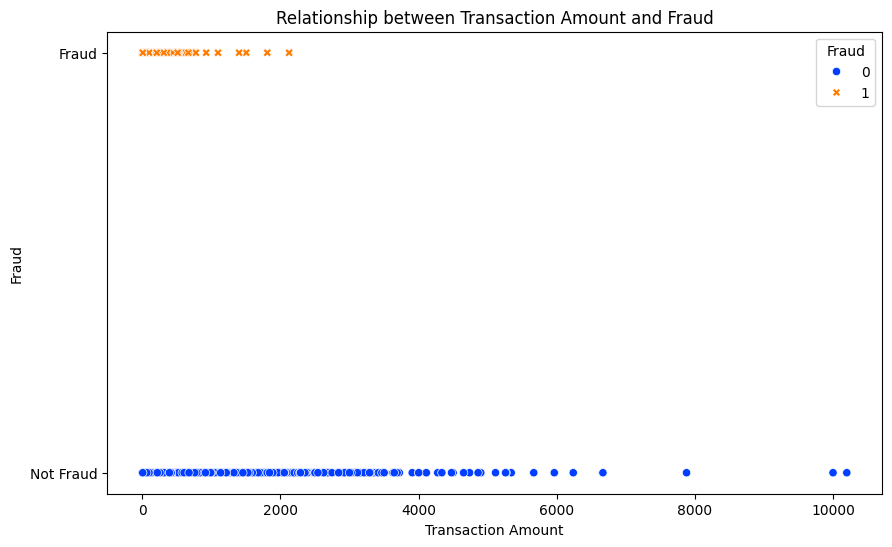

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fraud_train, x='Amount', y='Fraud',
                hue='Fraud', style='Fraud', palette='bright')
plt.title('Relationship between Transaction Amount and Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Fraud')
plt.yticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

This graph illustrates the relationship between transaction amounts and fraudulent activities. The scatter plot reveals the distribution of non-fraudulent transactions, marked as "0," and fraudulent ones, marked as "1," across various transaction amounts.

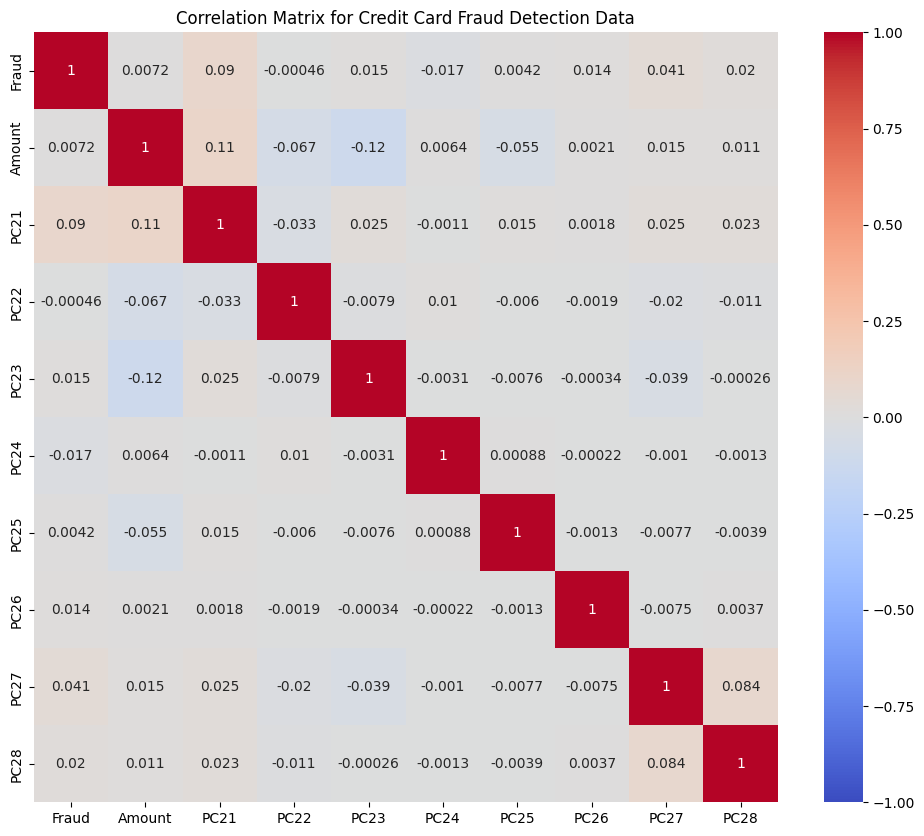

In [76]:
part_fraud_train = fraud_train[['Fraud', 'Amount', 'PC21',
                                'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28']]
correlation_matrix = part_fraud_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Credit Card Fraud Detection Data')
plt.show()

This heatmap displays the correlation coefficients between selected principal components (PC21 to PC28), the transaction amount, and the fraud label in a credit card fraud dataset. The color scale from red to blue shows the strength and direction of the correlations. Light colors indicate weak correlations, and most coefficients are near zero, suggesting there are not many strong linear relationships among these variables.

### Models

In [77]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [78]:
dump(rf, "credit-fraud.joblib")

['credit-fraud.joblib']

## Results

In [81]:
y_pred = rf.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9846153846153847
Recall: 0.810126582278481


I used the Ramdom Forest Classification Model to predict the fraud transactions. The model achieved an precision of 0.98 and a recall of 0.81. The model is able to detect most of the fraud transactions, while maintaining a high precision rate of 98%. This means that the model can accurately identify fraudulent transactions without flagging too many legitimate ones.

## Discussion

In a real-world scenario of credit card fraud detection, prioritizing recall is essential due to the significant financial risks associated with missing a fraudulent transaction. However, a high rate of false positives resulting from over-prioritizing recall could lead to customer dissatisfaction and operational strain. Therefore, a balanced approach that ensures a high level of recall without excessively compromising precision is crucial.

The selected model must offer a judicious balance, maintaining substantial recall to catch fraud effectively while keeping precision at a level that minimizes false alarms. Continuous evaluation and calibration of the model are required to align with the evolving patterns of fraud and the bank's operational dynamics.

### Conclusion

In conclusion, Lab 06 harnessed the power of machine learning through the implementation of a RandomForestClassifier model to predict fraudulent transactions in credit card data. While the model achieved commendable precision, indicative of its ability to accurately flag fraud when it occurs, the recall metric did not meet the same standard, suggesting room for improvement in identifying all instances of fraud. This discrepancy underscores the need for ongoing model refinement to enhance the detection of fraudulent activities without generating an excessive number of false positives. Future enhancements should focus on improving recall without significantly impacting the achieved precision, thus striving for a model that can more reliably support real-world fraud detection efforts. 